In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr 
import pandas as pd
#power one side positivamente correlate --> ipotesi nulla <0 
#permutazione ogni gruppo ha label calcola statistica con i label ma invece di usare referenza label la simula sulle permutazioni 
#ipotesi nulla non cambia niente poi ricalcola stastica e lo fa tantissime volte 
import numpy as np
import matplotlib.cm as cm

# Read the CSV
df = pd.read_csv('temporal_results.csv')

# Select desired columns
filtered_df_accuracy = df[['User', 'Early_Accuracy_Percent', 'Late_Accuracy_Percent']]

# Write to a new CSV
# filtered_df.to_csv('filtered_accuracy.csv', index=False)

print(filtered_df_accuracy.head())

    User  Early_Accuracy_Percent  Late_Accuracy_Percent
0  user1                   75.21                  91.53
1  user2                   78.57                 100.00
2  user3                   78.52                  73.53
3  user8                   78.68                  71.53
4  user9                   77.78                  67.03


In [2]:
import pandas as pd

# Read the CSV
df = pd.read_csv('comprehension_data.csv')

# Select desired columns
filtered_df_comprehension = df[['ID', 'COMPR_PRE', 'COMPR_POST']]
filtered_df_comprehension = filtered_df_comprehension.rename(columns={'ID': 'User'})

print(filtered_df_comprehension.head())

    User COMPR_PRE COMPR_POST
0  user1      6/24      13/24
1  user2     11/24      11/24
2  user3     11/24      11/24
3  user8     10/24       9/24
4  user9      9/24       7/24


In [3]:
# Function to convert "x/y" to percentage
def frac_to_percent(frac_str):
    num, denom = map(int, frac_str.split('/'))
    return round((num / denom) * 100, 2)
    
# Apply to both columns
filtered_df_comprehension['COMPR_PRE_PERCENT'] = filtered_df_comprehension['COMPR_PRE'].apply(frac_to_percent)
filtered_df_comprehension['COMPR_POST_PERCENT'] = filtered_df_comprehension['COMPR_POST'].apply(frac_to_percent)


In [4]:
filtered_df_comprehension

,User,COMPR_PRE,COMPR_POST,COMPR_PRE_PERCENT,COMPR_POST_PERCENT
0,user1,6/24,13/24,25.00,54.17
1,user2,11/24,11/24,45.83,45.83
2,user3,11/24,11/24,45.83,45.83
3,user8,10/24,9/24,41.67,37.50
4,user9,9/24,7/24,37.50,29.17
5,user10,12/24,12/24,50.00,50.00
6,user11,10/24,6/24,41.67,25.00
7,user12,9/24,11/24,37.50,45.83
8,user15,6/24,3/24,25.00,12.50
9,user24,8/24,10/24,33.33,41.67


In [5]:
filtered_df2_comprehension = filtered_df_comprehension[['User', 'COMPR_PRE_PERCENT', 'COMPR_POST_PERCENT']]

In [6]:
filtered_df2_comprehension

,User,COMPR_PRE_PERCENT,COMPR_POST_PERCENT
0,user1,25.00,54.17
1,user2,45.83,45.83
2,user3,45.83,45.83
3,user8,41.67,37.50
4,user9,37.50,29.17
5,user10,50.00,50.00
6,user11,41.67,25.00
7,user12,37.50,45.83
8,user15,25.00,12.50
9,user24,33.33,41.67


In [7]:
print(filtered_df2_comprehension.head())
print(filtered_df_accuracy.head())

    User  COMPR_PRE_PERCENT  COMPR_POST_PERCENT
0  user1              25.00               54.17
1  user2              45.83               45.83
2  user3              45.83               45.83
3  user8              41.67               37.50
4  user9              37.50               29.17
    User  Early_Accuracy_Percent  Late_Accuracy_Percent
0  user1                   75.21                  91.53
1  user2                   78.57                 100.00
2  user3                   78.52                  73.53
3  user8                   78.68                  71.53
4  user9                   77.78                  67.03


In [8]:
# For comprehension data
filtered_df2_comprehension['COMPR_CHANGE_PERCENT'] = (
    filtered_df2_comprehension['COMPR_POST_PERCENT'] - filtered_df2_comprehension['COMPR_PRE_PERCENT']
)

# For accuracy data
filtered_df_accuracy['Accuracy_Change_Percent'] = (
    filtered_df_accuracy['Late_Accuracy_Percent'] - filtered_df_accuracy['Early_Accuracy_Percent']
)

# Display results
print(filtered_df2_comprehension.head())
print(filtered_df_accuracy.head())

    User  COMPR_PRE_PERCENT  COMPR_POST_PERCENT  COMPR_CHANGE_PERCENT
0  user1              25.00               54.17                 29.17
1  user2              45.83               45.83                  0.00
2  user3              45.83               45.83                  0.00
3  user8              41.67               37.50                 -4.17
4  user9              37.50               29.17                 -8.33
    User  Early_Accuracy_Percent  Late_Accuracy_Percent  \
0  user1                   75.21                  91.53   
1  user2                   78.57                 100.00   
2  user3                   78.52                  73.53   
3  user8                   78.68                  71.53   
4  user9                   77.78                  67.03   

   Accuracy_Change_Percent  
0                    16.32  
1                    21.43  
2                    -4.99  
3                    -7.15  
4                   -10.75  


/var/folders/xg/275fmmmx52b3sq21l50dn4yw0000gn/T/ipykernel_22863/2463737220.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df2_comprehension['COMPR_CHANGE_PERCENT'] = (


In [9]:
print(filtered_df2_comprehension.head())
print(filtered_df_accuracy.head())

    User  COMPR_PRE_PERCENT  COMPR_POST_PERCENT  COMPR_CHANGE_PERCENT
0  user1              25.00               54.17                 29.17
1  user2              45.83               45.83                  0.00
2  user3              45.83               45.83                  0.00
3  user8              41.67               37.50                 -4.17
4  user9              37.50               29.17                 -8.33
    User  Early_Accuracy_Percent  Late_Accuracy_Percent  \
0  user1                   75.21                  91.53   
1  user2                   78.57                 100.00   
2  user3                   78.52                  73.53   
3  user8                   78.68                  71.53   
4  user9                   77.78                  67.03   

   Accuracy_Change_Percent  
0                    16.32  
1                    21.43  
2                    -4.99  
3                    -7.15  
4                   -10.75  


In [10]:
filtered_df_accuracy

,User,Early_Accuracy_Percent,Late_Accuracy_Percent,Accuracy_Change_Percent
0,user1,75.21,91.53,16.32
1,user2,78.57,100.00,21.43
2,user3,78.52,73.53,-4.99
3,user8,78.68,71.53,-7.15
4,user9,77.78,67.03,-10.75
5,user10,74.22,75.97,1.75
6,user11,79.38,75.26,-4.12
7,user12,72.58,75.81,3.23
8,user15,78.79,78.20,-0.59
9,user24,72.63,93.75,21.12


In [11]:
filtered_df2_comprehension

,User,COMPR_PRE_PERCENT,COMPR_POST_PERCENT,COMPR_CHANGE_PERCENT
0,user1,25.00,54.17,29.17
1,user2,45.83,45.83,0.00
2,user3,45.83,45.83,0.00
3,user8,41.67,37.50,-4.17
4,user9,37.50,29.17,-8.33
5,user10,50.00,50.00,0.00
6,user11,41.67,25.00,-16.67
7,user12,37.50,45.83,8.33
8,user15,25.00,12.50,-12.50
9,user24,33.33,41.67,8.34


In [12]:
merged = pd.merge(filtered_df_accuracy, filtered_df2_comprehension, left_on='User', right_on='User')


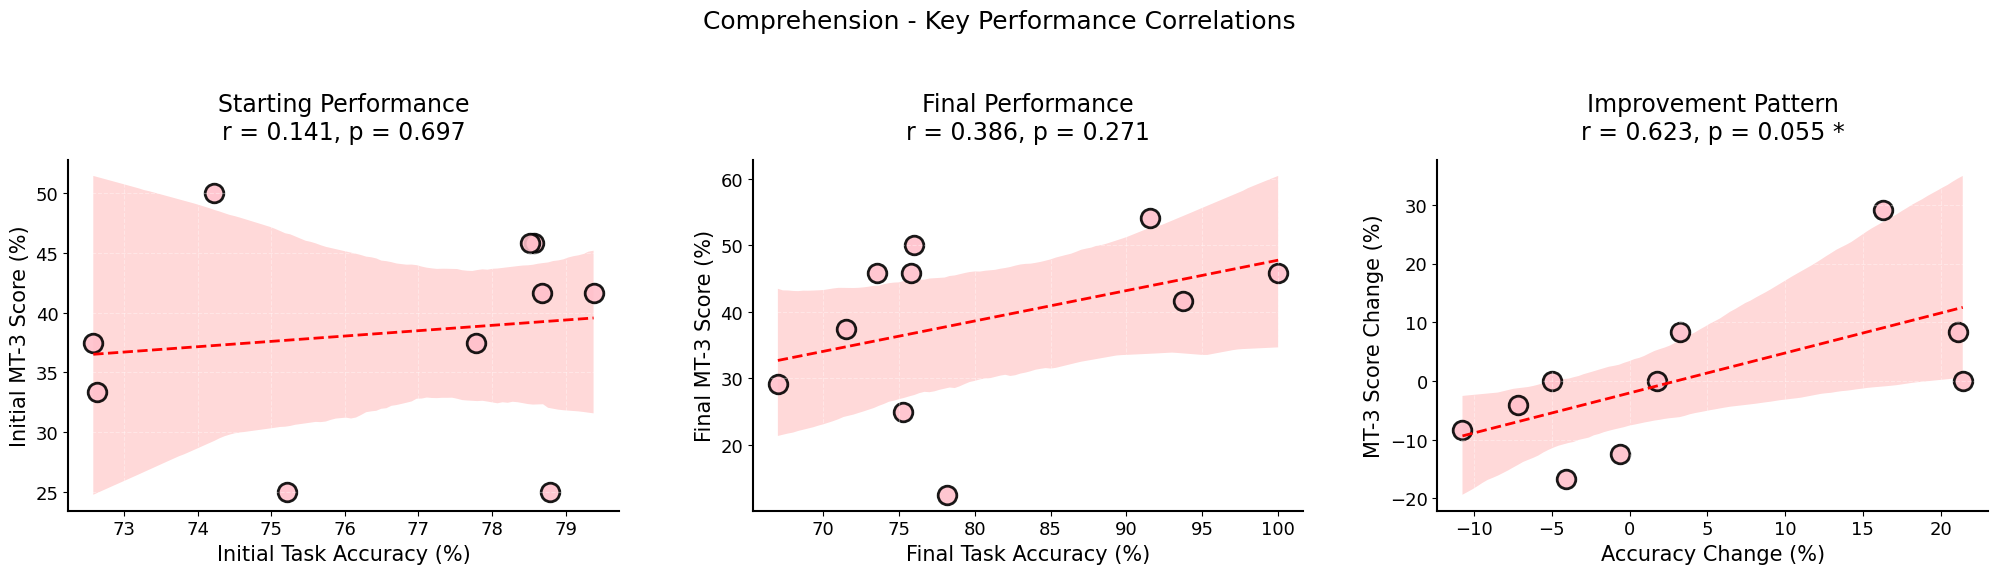

In [14]:
plt.rcParams.update({
    'font.size': 11,
    'font.family': 'DejaVu Sans',
    'axes.labelsize': 12,
    'axes.titlesize': 13,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.titlesize': 14,
    'axes.linewidth': 0.8,
    'grid.alpha': 0.3,
    'axes.spines.top': False,
    'axes.spines.right': False,
    # White background settings
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'savefig.facecolor': 'white',
    'savefig.edgecolor': 'none',
    # Black text settings
    'text.color': 'black',
    'axes.labelcolor': 'black',
    'xtick.color': 'black',
    'ytick.color': 'black',
    'axes.edgecolor': 'black',
    'axes.spines.left': True,
    'axes.spines.bottom': True
})

fig, axes = plt.subplots(1, 3, figsize=(21, 7))
fig.patch.set_facecolor('white')
fig.suptitle(
    "Comprehension - Key Performance Correlations",
    fontsize=18,  y=0.88
)

def plot_correlation(x, y, x_label, y_label, title, ax,alpha=0.10):
    sns.regplot(
        x=x, y=y, ax=ax,
        color='pink',
        line_kws={'color':'red', 'linestyle':'--', 'linewidth':2},
        scatter=False
    )
    ax.scatter(
        x, y,
        color='pink',
        edgecolor='black',
        s=180,
        alpha=0.9,
        linewidths=2
    )
    r, p = pearsonr(x, y)
    sig = " *" if p < alpha else ""
    ax.set_title(f"{title}\nr = {r:.3f}, p = {p:.3f}{sig}", fontsize=17,  pad=15)
    ax.set_xlabel(x_label, fontsize=15, )
    ax.set_ylabel(y_label, fontsize=15, )
    ax.tick_params(axis='both', labelsize=13)
    ax.grid(True, linestyle='--', alpha=0.35)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

plot_correlation(
    merged['Early_Accuracy_Percent'],
    merged['COMPR_PRE_PERCENT'],
    "Initial Task Accuracy (%)", "Initial MT-3 Score (%)", "Starting Performance", axes[0]
)
plot_correlation(
    merged['Late_Accuracy_Percent'],
    merged['COMPR_POST_PERCENT'],
    "Final Task Accuracy (%)", "Final MT-3 Score (%)", "Final Performance", axes[1]
)
plot_correlation(
    merged['Accuracy_Change_Percent'],
    merged['COMPR_CHANGE_PERCENT'],
    "Accuracy Change (%)", "MT-3 Score Change (%)", "Improvement Pattern", axes[2]
)

plt.tight_layout(rect=[0, 0, 1, 0.97], pad=4)
plt.savefig("thesis_correlations.png", dpi=400, bbox_inches='tight')
plt.show()

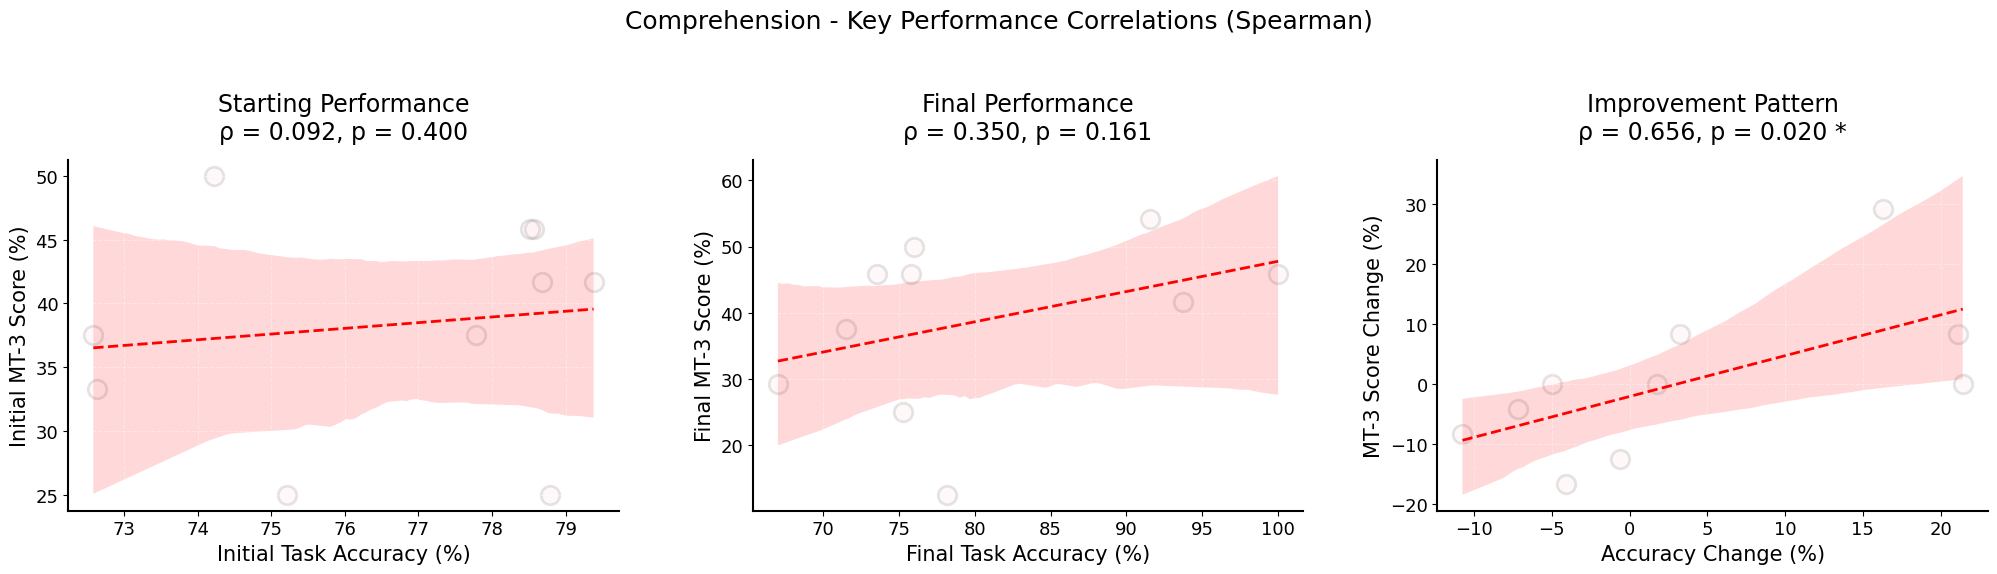

In [16]:
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams.update({
    'font.size': 11,
    'font.family': 'DejaVu Sans',
    'axes.labelsize': 12,
    'axes.titlesize': 13,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.titlesize': 14,
    'axes.linewidth': 0.8,
    'grid.alpha': 0.3,
    'axes.spines.top': False,
    'axes.spines.right': False,
    # White background settings
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'savefig.facecolor': 'white',
    'savefig.edgecolor': 'none',
    # Black text settings
    'text.color': 'black',
    'axes.labelcolor': 'black',
    'xtick.color': 'black',
    'ytick.color': 'black',
    'axes.edgecolor': 'black',
    'axes.spines.left': True,
    'axes.spines.bottom': True
})

fig, axes = plt.subplots(1, 3, figsize=(21, 7))
fig.patch.set_facecolor('white')
fig.suptitle(
    "Comprehension - Key Performance Correlations (Spearman)",
    fontsize=18,  y=0.88
)

def plot_correlation(x, y, x_label, y_label, title, ax, alpha=0.10):
    sns.regplot(
        x=x, y=y, ax=ax,
        color='pink',
        line_kws={'color': 'red', 'linestyle': '--', 'linewidth': 2},
        scatter=False
    )
    ax.scatter(
        x, y,
        color='pink',
        edgecolor='black',
        s=180,
        alpha=0.1,
        linewidths=2
    )
    r, p = spearmanr(x, y, alternative="greater")
    sig = " *" if p < alpha else ""
    ax.set_title(f"{title}\nρ = {r:.3f}, p = {p:.3f}{sig}", fontsize=17, pad=15)
    ax.set_xlabel(x_label, fontsize=15)
    ax.set_ylabel(y_label, fontsize=15)
    ax.tick_params(axis='both', labelsize=13)
    ax.grid(True, linestyle='--', alpha=0.35)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

plot_correlation(
    merged['Early_Accuracy_Percent'],
    merged['COMPR_PRE_PERCENT'],
    "Initial Task Accuracy (%)", "Initial MT-3 Score (%)", "Starting Performance", axes[0]
)
plot_correlation(
    merged['Late_Accuracy_Percent'],
    merged['COMPR_POST_PERCENT'],
    "Final Task Accuracy (%)", "Final MT-3 Score (%)", "Final Performance", axes[1]
)
plot_correlation(
    merged['Accuracy_Change_Percent'],
    merged['COMPR_CHANGE_PERCENT'],
    "Accuracy Change (%)", "MT-3 Score Change (%)", "Improvement Pattern", axes[2]
)

plt.tight_layout(rect=[0, 0, 1, 0.97], pad=4)
plt.savefig("thesis_correlations_spearman.png", dpi=400, bbox_inches='tight')
plt.show()
